Regression

In [167]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [187]:
data = pd.read_csv("/Users/xinyuyangren/Desktop/1000_hourlyall.csv")
data = data.dropna()
data['avg_wc_all'] = data['avg_wc_br2'] + data['avg_wc_br1_br3'] + data['avg_wc_lr']
data['avg_t_diff'] = (data['avg_t_lr'] + data['avg_t_br2'] + data['avg_t_br1_br3'])/3 - data['avg_t']

In [188]:
data.describe()

,avg_windspeed,avg_irradiation,avg_rh,avg_t,avg_wc_lr,avg_wc_br2,avg_wc_br1_br3,set_point_ventilation_unit,avg_t_lr,avg_t_br2,...,avg_co2_lr,avg_co2_br2,avg_co2_br1_br3,gc,ecop,ecp,epop,epp,avg_wc_all,avg_t_diff
count,15588.000000,15588.000000,15588.000000,15588.000000,15588,15588.000000,15588.000000,15588.000000,15588.000000,15588.000000,...,15588.000000,15588.000000,15588.000000,15588.00000,15588.000000,15588.000000,15588,15588,15588.000000,15588.000000
mean,1.937644,118.320054,78.921093,11.516121,1,0.911122,0.699098,10.344293,17.979327,23.106290,...,622.450485,856.775789,1028.884528,0.05027,401.975879,272.196562,0,0,2.610220,9.714775
std,1.677681,197.589595,15.565863,6.616470,0,0.278821,0.444303,1.151841,7.102122,2.109257,...,336.004330,153.014263,367.934149,0.11095,644.354779,534.668735,0,0,0.576067,6.428021
min,0.000000,-576.000000,0.000000,-90.000000,1,0.000000,0.000000,3.500000,4.390000,18.257500,...,3.990000,571.326320,508.237500,0.00000,0.000000,0.000000,0,0,1.000000,-10.529607
25%,1.000000,-4.000000,69.000000,6.900000,1,1.000000,0.000000,9.750000,18.235875,21.455927,...,585.017483,720.601910,726.062052,0.00000,0.000000,0.000000,0,0,2.000000,5.295421
50%,2.000000,2.000000,83.000000,11.500000,1,1.000000,1.000000,10.300000,20.603315,22.559350,...,723.824790,872.338335,925.763230,0.00000,0.000000,0.000000,0,0,3.000000,10.047558
75%,3.000000,170.000000,91.000000,16.200000,1,1.000000,1.000000,11.100000,22.475343,24.524822,...,832.122060,971.256670,1296.215487,0.01500,1000.000000,0.000000,0,0,3.000000,13.804762
max,13.000000,957.000000,100.000000,34.300000,1,1.000000,1.000000,19.350000,27.446000,30.123530,...,1628.658820,1736.520000,2344.180000,1.08400,8000.000000,7000.000000,0,0,3.000000,111.437130


In [189]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
t = pd.DatetimeIndex(data['timestamp'])
hr = t.hour
data['HourOfDay'] = hr
month = t.month
data['Month'] = month
yr = t.year
data['Year'] = yr
data_Spring = data[(data.Month >= 3) & (data.Month <= 5)]
data_Spring['Season']='Spring'
data_Summer = data[(data.Month >= 6) & (data.Month <= 8)]
data_Summer['Season']='Summer'
data_Autumn = data[(data.Month >= 9) & (data.Month <= 11)]
data_Autumn['Season']='Autumn'
data_Winter_1 = data[(data.Month >= 12)]
data_Winter_2 = data[(data.Month <= 2)]      
data_Winter = pd.concat([data_Winter_1,data_Winter_2])
data_Winter['Season']='Winter'
data_seasons = pd.concat([data_Spring,data_Summer,data_Autumn,data_Winter])
data_night_1 = data[(data.HourOfDay >= 0) & (data.HourOfDay <= 7)]
data_night_2 = data[(data.HourOfDay >= 21) & (data.HourOfDay <= 24)]
data_night = pd.concat([data_night_1,data_night_2])


/Users/xinyuyangren/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/xinyuyangren/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/xinyuyangren/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

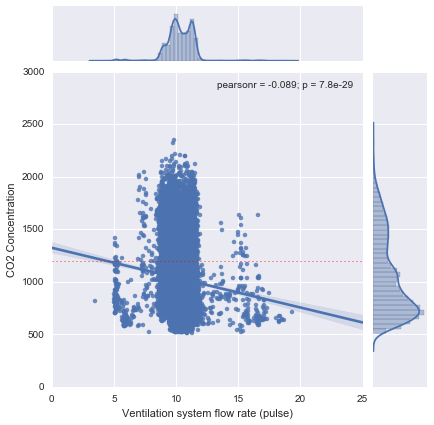

In [171]:
sns.jointplot(x="set_point_ventilation_unit", y="avg_co2_br1_br3", kind = 'reg', data=data)
plt.xlabel('Ventilation system flow rate (pulse)')
plt.ylabel('CO2 Concentration')
plt.axhline(y=1200, linestyle = 'dotted',linewidth=0.8, c = 'r')

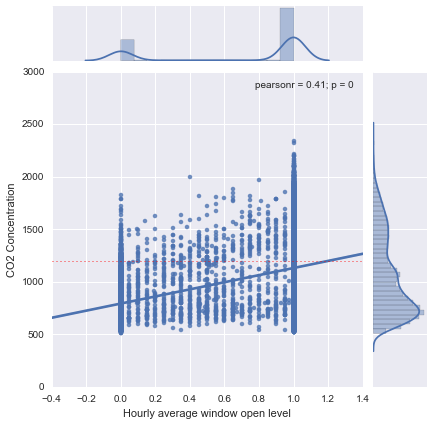

In [172]:
sns.jointplot(x="avg_wc_br1_br3", y="avg_co2_br1_br3", kind = 'reg', data=data)
plt.xlabel('Hourly average window open level')
plt.ylabel('CO2 Concentration')
plt.axhline(y=1200, linestyle = 'dotted',linewidth=0.8, c = 'r')

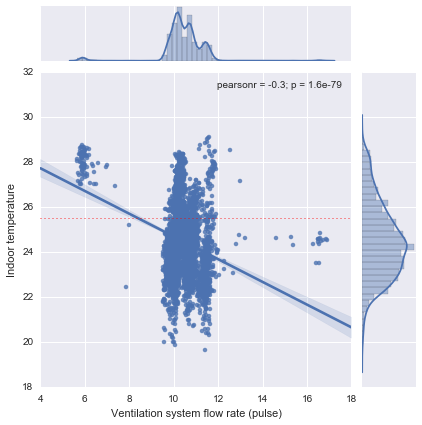

In [173]:
sns.jointplot(x="set_point_ventilation_unit", y="avg_t_br1_br3", kind = 'reg', data=data_Summer)
plt.xlabel('Ventilation system flow rate (pulse)')
plt.ylabel('Indoor temperature')
plt.axhline(y=25.5, linestyle = 'dotted',linewidth=0.8, c = 'r')

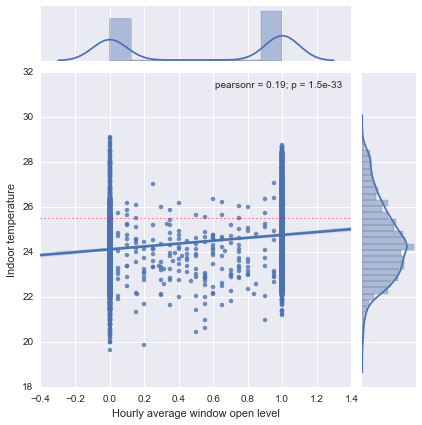

In [174]:
sns.jointplot(x="avg_wc_br1_br3", y="avg_t_br1_br3", kind = 'reg', data=data_Summer)
plt.xlabel('Hourly average window open level')
plt.ylabel('Indoor temperature')
plt.axhline(y=25.5, linestyle = 'dotted',linewidth=0.8, c = 'r')

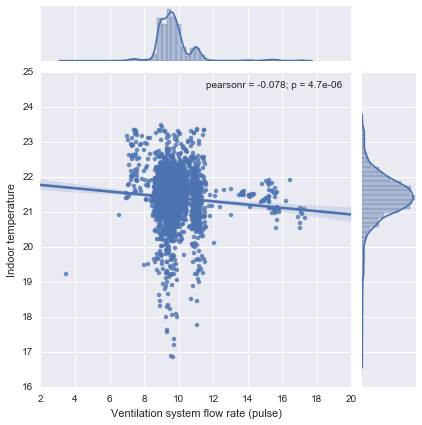

In [175]:
sns.jointplot(x="set_point_ventilation_unit", y="avg_t_br1_br3", kind = 'reg', data=data_Winter)
plt.xlabel('Ventilation system flow rate (pulse)')
plt.ylabel('Indoor temperature')
plt.axhline(y=16, linestyle = 'dotted',linewidth=0.8, c = 'r')

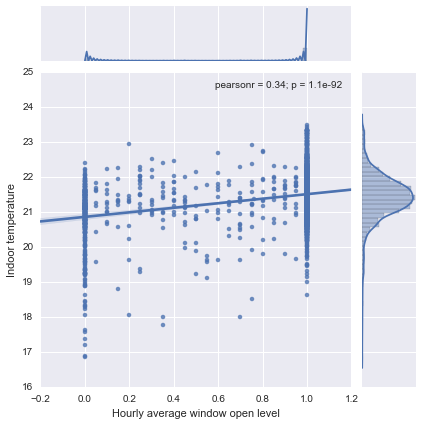

In [176]:
sns.jointplot(x="avg_wc_br1_br3", y="avg_t_br1_br3", kind = 'reg', data=data_Winter)
plt.xlabel('Hourly average window open level')
plt.ylabel('Indoor temperature')
plt.axhline(y=16, linestyle = 'dotted',linewidth=0.8, c = 'r')

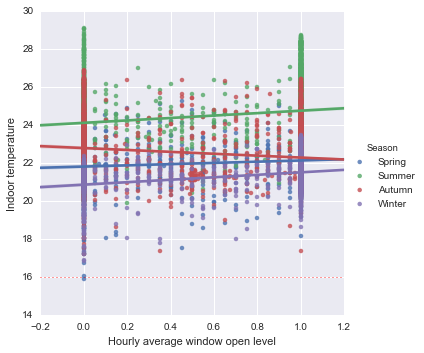

In [177]:
sns.lmplot(x="avg_wc_br1_br3", y="avg_t_br1_br3", hue = "Season", data = data_seasons)
plt.xlabel('Hourly average window open level')
plt.ylabel('Indoor temperature')
plt.axhline(y=16, linestyle = 'dotted',linewidth=0.8, c = 'r')

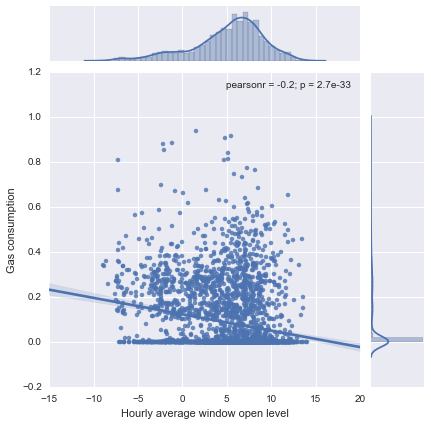

In [182]:
sns.jointplot(x="avg_t", y="gc", kind = 'reg', data=data_Winter)
plt.xlabel('Outside temperature')
plt.ylabel('Gas consumption')

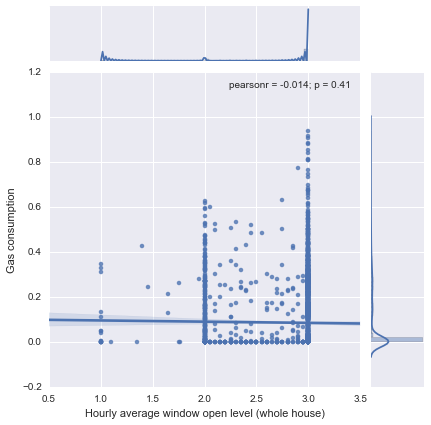

In [190]:
sns.jointplot(x="avg_wc_all", y="gc", kind = 'reg', data=data_Winter)
plt.xlabel('Hourly average window open level (whole house)')
plt.ylabel('Gas consumption')

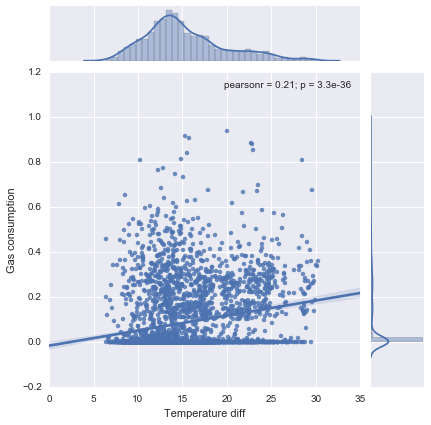

In [195]:
sns.jointplot(x="avg_t_diff", y="gc", kind = 'reg', data=data_Winter)
plt.xlabel('Temperature diff')
plt.ylabel('Gas consumption')